In [1]:
!pip install prophet

     --------------------------------------- 12.1/12.1 MB 11.1 MB/s eta 0:00:00
     ---------------------------------------- 230.6/230.6 kB ? eta 0:00:00
     ---------------------------------------- 83.2/83.2 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 47.9/47.9 kB ? eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 340.1/340.1 kB 22.0 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 11.4 MB/s eta 0:00:00
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732001 sha256=ee62471e6c7cde7bc1af407bf784254d54cbe3bc90c6cac4380646fbf0ecaf81
  Stored in directory: c:\users\igor\appdata\local\pip\cache\wheels\04\1f\e5\8dd0c661cd8d252817655dc14a84f7ae045d6616594145aa81
Successfully built pymeeus


In [3]:
import yfinance as yf
from prophet import Prophet
from prophet.plot import plot_plotly

In [13]:
ticker = input("Digite ticker da ação desejada: ")
dados = yf.Ticker(ticker).history('2y')

Digite ticker da ação desejada: PETR4.SA


In [14]:
dados

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-03-10 00:00:00-03:00,10.421473,10.611472,10.250473,10.611472,111744100,0.0,0.0
2021-03-11 00:00:00-03:00,10.744471,11.157719,10.739721,11.062720,130577500,0.0,0.0
2021-03-12 00:00:00-03:00,10.996220,11.105469,10.858471,11.005720,68123200,0.0,0.0
2021-03-15 00:00:00-03:00,10.977220,11.243219,10.972470,11.233719,68295000,0.0,0.0
2021-03-16 00:00:00-03:00,11.224220,11.247970,11.034221,11.057971,43407900,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-06 00:00:00-03:00,25.700001,26.120001,25.370001,25.959999,50227400,0.0,0.0
2023-03-07 00:00:00-03:00,25.719999,25.780001,24.930000,25.100000,59052500,0.0,0.0
2023-03-08 00:00:00-03:00,25.150000,25.920000,25.129999,25.420000,66220400,0.0,0.0


In [22]:
treinamento = dados.reset_index()
treinamento

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-03-10 00:00:00-03:00,10.421473,10.611472,10.250473,10.611472,111744100,0.0,0.0
1,2021-03-11 00:00:00-03:00,10.744471,11.157719,10.739721,11.062720,130577500,0.0,0.0
2,2021-03-12 00:00:00-03:00,10.996220,11.105469,10.858471,11.005720,68123200,0.0,0.0
3,2021-03-15 00:00:00-03:00,10.977220,11.243219,10.972470,11.233719,68295000,0.0,0.0
4,2021-03-16 00:00:00-03:00,11.224220,11.247970,11.034221,11.057971,43407900,0.0,0.0
...,...,...,...,...,...,...,...,...
496,2023-03-06 00:00:00-03:00,25.700001,26.120001,25.370001,25.959999,50227400,0.0,0.0
497,2023-03-07 00:00:00-03:00,25.719999,25.780001,24.930000,25.100000,59052500,0.0,0.0
498,2023-03-08 00:00:00-03:00,25.150000,25.920000,25.129999,25.420000,66220400,0.0,0.0
499,2023-03-09 00:00:00-03:00,25.350000,26.230000,25.280001,25.309999,68042300,0.0,0.0


<AxesSubplot:xlabel='Date'>

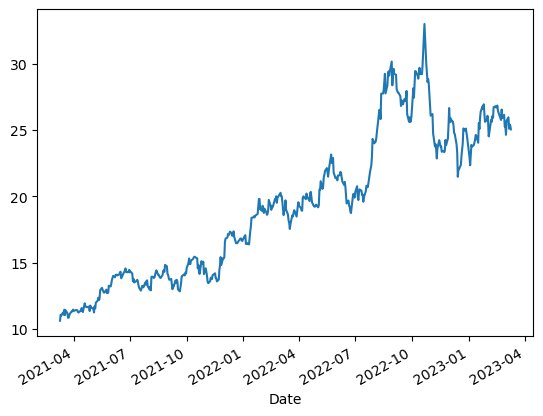

In [20]:
dados.Close.plot()

In [23]:
treinamento ["Date"] = treinamento["Date"].dt.tz_localize(None)

In [24]:
treinamento = treinamento[['Date', 'Close']]

In [25]:
treinamento.columns = ['ds', 'y']

In [28]:
modelo = Prophet()
modelo.fit(treinamento)
periodo = modelo.make_future_dataframe(periods=90)
previsoes = modelo.predict(periodo)

20:21:59 - cmdstanpy - INFO - Chain [1] start processing
20:22:00 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
plot_plotly(modelo, previsoes, xlabel="periodo", ylabel="valor")